#### 1.0 Importing Dependencies:

In [1]:
# Importing dependencies:
import pandas as pd
import numpy as np
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Set custom preferences for displaying and visualizing data
# sns.set_style('white')
pd.set_option('max_colwidth', 120)
pd.set_option('max_columns', 200)
pd.set_option('precision', 2)
plt.rcParams["figure.figsize"] = (10, 7.5)

%matplotlib inline

#### 2.0 Applied Machine Leaning:

#### 2.1 Loading Datasets:

In [56]:
df = pd.read_csv('data/clean_demographic_transaction.csv')
df.head()

//anaconda3/envs/Springboard/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,customer_price,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1520,1,0.0,0.0,2.19,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1520,1,0.0,0.0,2.99,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1520,1,0.0,0.0,3.09,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1520,1,0.0,0.0,2.50,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1520,1,0.0,0.0,0.60,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown


In [57]:
df_sorted = pd.read_csv('data/df_first_purchase.csv')
df_sorted.head()

,product_id,store_id,household_key,basket_id,sales_value,day
0,878302,337,98,26984951769,0.90,1
1,965138,337,98,26984951769,3.00,1
2,985911,337,98,26984951769,1.25,1
3,1082185,337,98,26984951769,0.39,1
4,1087347,337,98,26984951769,0.25,1


#### 2.2 Getting Top 10 Products:

In [58]:
top_10 = df['product_id'].value_counts().index
top_10 = top_10[:10]
top_10

Int64Index([1082185, 6534178, 1029743,  995242,  981760, 1106523, 1133018,
             951590, 1127831,  883404],
           dtype='int64')

In [5]:
df_ml = df.loc[df['product_id'].isin(top_10)]
df_ml = df_ml.groupby(['household_key', 'product_id']).size().reset_index(name='count')
df_ml.head()

,household_key,product_id,count
0,1,995242,35
1,1,1029743,2
2,1,1082185,41
3,7,995242,1
4,7,1029743,2


In [6]:
df_sorted_ml = df_sorted.groupby(['household_key', 'product_id']).size().reset_index(name='count').sort_values('household_key')
df_sorted_ml.head()

,household_key,product_id,count
0,1,819312,1
444,1,1111870,3
445,1,1112333,1
446,1,1113385,1
447,1,1115576,3


In [7]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5089 entries, 0 to 5088
Data columns (total 3 columns):
household_key    5089 non-null int64
product_id       5089 non-null int64
count            5089 non-null int64
dtypes: int64(3)
memory usage: 119.4 KB


In [8]:
df_sorted_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700879 entries, 0 to 700878
Data columns (total 3 columns):
household_key    700879 non-null int64
product_id       700879 non-null int64
count            700879 non-null int64
dtypes: int64(3)
memory usage: 21.4 MB


#### 2.3 Creating Dummy Results:

In [10]:
basket = (df_ml.groupby(['household_key', 'product_id'])['count'].sum().unstack().reset_index().fillna(0).set_index('household_key'))
basket.head()

product_id,883404,951590,981760,995242,1029743,1082185,1106523,1127831,1133018,6534178
household_key,,,,,,,,,,
1,0.0,0.0,0.0,35.0,2.0,41.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,2.0,28.0,11.0,3.0,5.0,0.0
8,3.0,1.0,5.0,4.0,9.0,31.0,8.0,1.0,10.0,6.0
13,0.0,18.0,0.0,38.0,60.0,34.0,7.0,1.0,8.0,80.0
16,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
basket_sorted = (df_sorted_ml.groupby(['household_key', 'product_id'])['count'].sum().unstack().reset_index().fillna(0).set_index('household_key'))
basket_sorted.head()

product_id,25671,26601,26636,26738,27021,27158,27334,27346,27479,27491,27503,27509,27522,27658,27686,27732,27735,27745,27754,27760,27812,27894,27933,27951,27958,28041,28143,28165,28200,28219,28267,28268,28272,28326,28424,28453,28897,28929,28966,29618,29629,29936,29977,29989,30177,30295,30317,30339,30356,30374,30613,30699,30800,30962,31159,31349,31534,31681,31704,32124,32160,32243,32247,32369,32384,32387,32392,32439,32440,32454,32456,32457,32482,32553,32562,32608,32785,32916,32987,33247,33345,33401,33522,33555,33592,33614,33882,33965,34039,34138,34145,34160,34187,34204,34233,34269,34345,34349,34359,34480,...,18105562,18105641,18106059,18106104,18106138,18106229,18106248,18106258,18106286,18106415,18106655,18106670,18106701,18106818,18106881,18107080,18107092,18107212,18107220,18107265,18107345,18107424,18118865,18118972,18118989,18119004,18119016,18119460,18119463,18119475,18119592,18119983,18120172,18120486,18120821,18120904,18127762,18131707,18131909,18143349,18147269,18147457,18147510,18147540,18147572,18147612,18147773,18147946,18148096,18148128,18148208,18148439,18148441,18148533,18148536,18148548,18148596,18148632,18148654,18148676,18148708,18148726,18148794,18148806,18148815,18148870,18183625,18183737,18183744,18183776,18184178,18184179,18184230,18185083,18185268,18185306,18185750,18185766,18186504,18186729,18189027,18192496,18192639,18203504,18203921,18204200,18205871,18206211,18243471,18243476,18243940,18244314,18244317,18244453,18253088,18273115,18292005,18293696,18294080,18316298
household_key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

#### 2.4 Encoder Formula:

In [12]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

#### 2.5 Encoding Baskets:

In [13]:
encoded_baskets = basket.applymap(encode_units)
encoded_baskets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 1 to 2499
Data columns (total 10 columns):
883404     798 non-null int64
951590     798 non-null int64
981760     798 non-null int64
995242     798 non-null int64
1029743    798 non-null int64
1082185    798 non-null int64
1106523    798 non-null int64
1127831    798 non-null int64
1133018    798 non-null int64
6534178    798 non-null int64
dtypes: int64(10)
memory usage: 68.6 KB


In [14]:
encoded_baskets_sorted = basket_sorted.applymap(encode_units)
encoded_baskets_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 1 to 2499
Columns: 67902 entries, 25671 to 18316298
dtypes: int64(67902)
memory usage: 415.0 MB


#### 2.6 Finding Consequents and Antecendents:

In [98]:
frequent_itemsets = apriori(encoded_baskets_sorted, min_support=0.25, use_colnames=True)

TypeError: apriori() got an unexpected keyword argument 'min_lift'

In [103]:
rules = pd.DataFrame(association_rules(frequent_itemsets, metric="lift", min_threshold=1))
rules.sort_values("lift", ascending=False, inplace=True)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
166102,"(30004, 33340)","(18433, 30797)",0.36,0.38,0.25,0.69,1.85,0.12,2.04
166099,"(18433, 30797)","(30004, 33340)",0.38,0.36,0.25,0.67,1.85,0.12,1.94
292944,"(28417, 20748, 33340)","(18433, 30797)",0.36,0.38,0.25,0.69,1.84,0.11,2.03
292949,"(18433, 30797)","(28417, 20748, 33340)",0.38,0.36,0.25,0.67,1.84,0.11,1.92
292938,"(18433, 30797, 28417)","(20748, 33340)",0.37,0.37,0.25,0.68,1.84,0.11,1.98
292955,"(20748, 33340)","(18433, 30797, 28417)",0.37,0.37,0.25,0.68,1.84,0.11,1.97
292941,"(18433, 20748, 33340)","(28417, 30797)",0.33,0.42,0.25,0.76,1.83,0.11,2.45
292952,"(28417, 30797)","(18433, 20748, 33340)",0.42,0.33,0.25,0.60,1.83,0.11,1.69
292943,"(28417, 20748, 30797)","(18433, 33340)",0.32,0.43,0.25,0.79,1.83,0.11,2.66
292950,"(18433, 33340)","(28417, 20748, 30797)",0.43,0.32,0.25,0.58,1.83,0.11,1.64


In [104]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314234 entries, 166102 to 65946
Data columns (total 9 columns):
antecedents           314234 non-null object
consequents           314234 non-null object
antecedent support    314234 non-null float64
consequent support    314234 non-null float64
support               314234 non-null float64
confidence            314234 non-null float64
lift                  314234 non-null float64
leverage              314234 non-null float64
conviction            314234 non-null float64
dtypes: float64(7), object(2)
memory usage: 24.0+ MB


In [95]:
for item in association_results:
    print(item)
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

support


IndexError: list index out of range

#### 2.7 Train Test Model:

In [21]:
def train_test_model(X, y, model, params, test_size=.2, random_state=42):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    model_cv = GridSearchCV(model, param_grid=params, cv=5)
    
    model_cv.fit(X_train, y_train)
    
    y_pred = model_cv.predict(X_test)
    
    y_pred_prob = model_cv.predict_proba(X_test)[:,1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show();
    
    # Print the optimal parameters and best score
    print("Tuned Hyperparameter(s): {}".format(model_cv.best_params_))
    print("Tuned Accuracy Score: {}".format(model_cv.best_score_))
    print(classification_report(y_test, y_pred))

In [22]:
X = df_ml.drop('household_key', axis=1).values
y = df_ml['household_key'].values
print(X.shape, y.shape)

(5089, 2) (5089,)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

#### 2.8 KMean:

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0, verbose=0)
kmeans.fit(X_train, y_train)
kmeans.score(X_test, y_test)

-554387182239.691

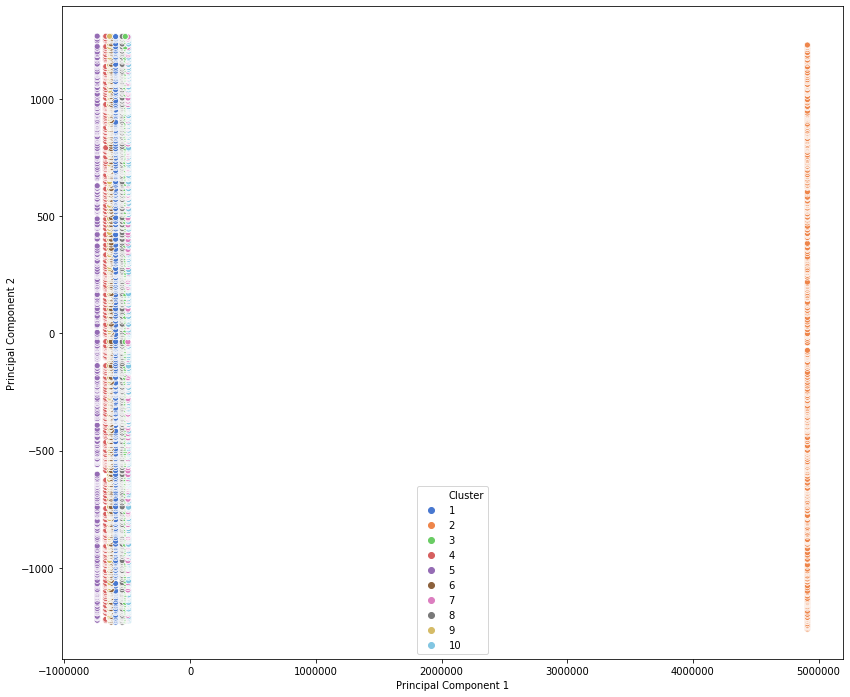

In [31]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Do not include the households with 'unknown' values for some demographic features
# c = (df_hh_demographic['MARITAL_STATUS_CODE'] != 'U') & \
#     (df_hh_demographic['HH_COMP_DESC'] != 'Unknown') & \
#     (df_hh_demographic['HOMEOWNER_DESC'] != 'Unknown') & \
#     (df_hh_demographic['KID_CATEGORY_DESC'] != 'None/Unknown')

# Set number of clusters
k = 10

# One-hot encode categorical demographic features
X = pd.get_dummies(df_ml)

# Use PCA to project the demographic data into 2 dimensions
pca = PCA(n_components=2).fit(X)
X_proj = pca.transform(X)

# Cluster the 2D data using K-means
kmeans = KMeans(n_clusters=k).fit(X_proj)
labels = kmeans.labels_.reshape(-1, 1) + 1

df_ml_clustered = pd.DataFrame(np.concatenate((X_proj, labels), axis=1), columns=['Principal Component 1', 'Principal Component 2', 'Cluster'])
df_ml_clustered['Cluster'] = df_ml_clustered['Cluster'].astype(int)

f, ax = plt.subplots(figsize=(14, 12))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2',  data=df_ml_clustered, hue='Cluster', palette=sns.color_palette('muted', n_colors=k))
plt.show()

In [33]:
df_ml_clustered.head()

,Principal Component 1,Principal Component 2,Cluster
0,-627887.06,-1231.25,6
1,-593386.06,-1231.49,1
2,-540944.06,-1231.83,8
3,-627887.06,-1225.26,6
4,-593386.06,-1225.49,1


In [36]:
df['Cluster'] = labels

print(df_ml_clustered[df_ml_clustered['Cluster'] == 1]['-627887.06'].value_counts())
# print()
# print(df_ml_clustered[df_ml_clustered['Cluster'] == 2]['HOUSEHOLD_SIZE_DESC'].value_counts())
# print()
# print(df_ml_clustered[df_ml_clustered['Cluster'] == 3]['HOUSEHOLD_SIZE_DESC'].value_counts())

KeyError: '-627887.06'